<a href="https://colab.research.google.com/github/Prit227/EDA1-Global-Terrorism-Analysis/blob/main/Pritam_P_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
#Importing Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
gt_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Copy of Global Terrorism Data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


##Data Processing and cleaning
###Raw data is often unorecognized and contains a lot of information which is irrelevant to the project requirements. Data preprocessing methodology helps in converting this raw data into a more    meaningful, focused, interpretable and readable format. 

In [ ]:
#Rename and extract useful columns for better understanding before getting in dataframe.
gt_df.rename(columns ={'iyear':'Year', 'imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'Attack','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group_name','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','suicide':'Suicide','city':'City'}, inplace = True)
#Keep only Relevant columns in the Dataframe.
gt_df = gt_df[['eventid','Year','Month','Day','Country','Region','Attack','Target','Killed','Wounded','Summary','Group_name','Target_type','Weapon_type','Motive','latitude','longitude','Suicide','City']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#Data Wrangling

In [ ]:
#This column shows us total no.of casualties in a particular attack
gt_df['Casualties'] = gt_df['Killed'] + gt_df['Wounded']
#Removed Unknown Values in City Column
gt_df.drop(gt_df.index[gt_df['City'] == 'Unknown'], inplace= True)

In [ ]:
gt_df.head(10)

,eventid,Year,Month,Day,Country,Region,Attack,Target,Killed,Wounded,Summary,Group_name,Target_type,Weapon_type,Motive,latitude,longitude,Suicide,City,Casualties
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,18.456792,-69.951164,0,Santo Domingo,1.0
1,197000000002,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,19.371887,-99.086624,0,Mexico city,0.0
3,197001000002,1970,1,0,Greece,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN,37.997490,23.762728,0,Athens,NaN
4,197001000003,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,33.580412,130.396361,0,Fukouka,NaN
5,197001010002,1970,1,1,United States,North America,Armed Assault,Cairo Police Headquarters,0.0,0.0,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,37.005105,-89.176269,0,Cairo,0.0
6,197001020001,1970,1,2,Uruguay,South America,Assassination,Juan Maria de Lucah/Chief of Directorate of in...,0.0,0.0,NaN,Tupamaros (Uruguay),Police,Firearms,NaN,-34.891151,-56.187214,0,Montevideo,0.0
7,197001020002,1970,1,2,United States,North America,Bombing/Explosion,Edes Substation,0.0,0.0,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN,37.791927,-122.225906,0,Oakland,0.0
8,197001020003,1970,1,2,United States,North America,Facility/Infrastructure Attack,"R.O.T.C. offices at University of Wisconsin, M...",0.0,0.0,"1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,43.076592,-89.412488,0,Madison,0.0
9,197001030001,1970,1,3,United States,North America,Facility/Infrastructure Attack,Selective Service Headquarters in Madison Wisc...,0.0,0.0,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,43.072950,-89.386694,0,Madison,0.0
10,197001050001,1970,1,1,United States,North America,Bombing/Explosion,Badger Army ammo depot.,0.0,0.0,NaN,"Weather Underground, Weathermen",Military,Explosives,NaN,43.468500,-89.744299,0,Baraboo,0.0


In [ ]:
gt_df.isnull().sum()

eventid             0
Year                0
Month               0
Day                 0
Country             0
Region              0
Attack              0
Target            544
Killed           9524
Wounded         15296
Summary         61472
Group_name          0
Target_type         0
Weapon_type         0
Motive         123269
latitude         2315
longitude        2316
Suicide             0
City              434
Casualties      15824
dtype: int64

In [ ]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171916 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   eventid      171916 non-null  int64  
 1   Year         171916 non-null  int64  
 2   Month        171916 non-null  int64  
 3   Day          171916 non-null  int64  
 4   Country      171916 non-null  object 
 5   Region       171916 non-null  object 
 6   Attack       171916 non-null  object 
 7   Target       171372 non-null  object 
 8   Killed       162392 non-null  float64
 9   Wounded      156620 non-null  float64
 10  Summary      110444 non-null  object 
 11  Group_name   171916 non-null  object 
 12  Target_type  171916 non-null  object 
 13  Weapon_type  171916 non-null  object 
 14  Motive       48647 non-null   object 
 15  latitude     169601 non-null  float64
 16  longitude    169600 non-null  float64
 17  Suicide      171916 non-null  int64  
 18  City         171482 non-

#Terrorism by Country and Region.





Country with Highest Terrorist Attack is Iraq
Region with Highest Terrorist Attack is Middle East & North Africa
Maximum People killed in an attack are 1570.0 that took place in Iraq


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


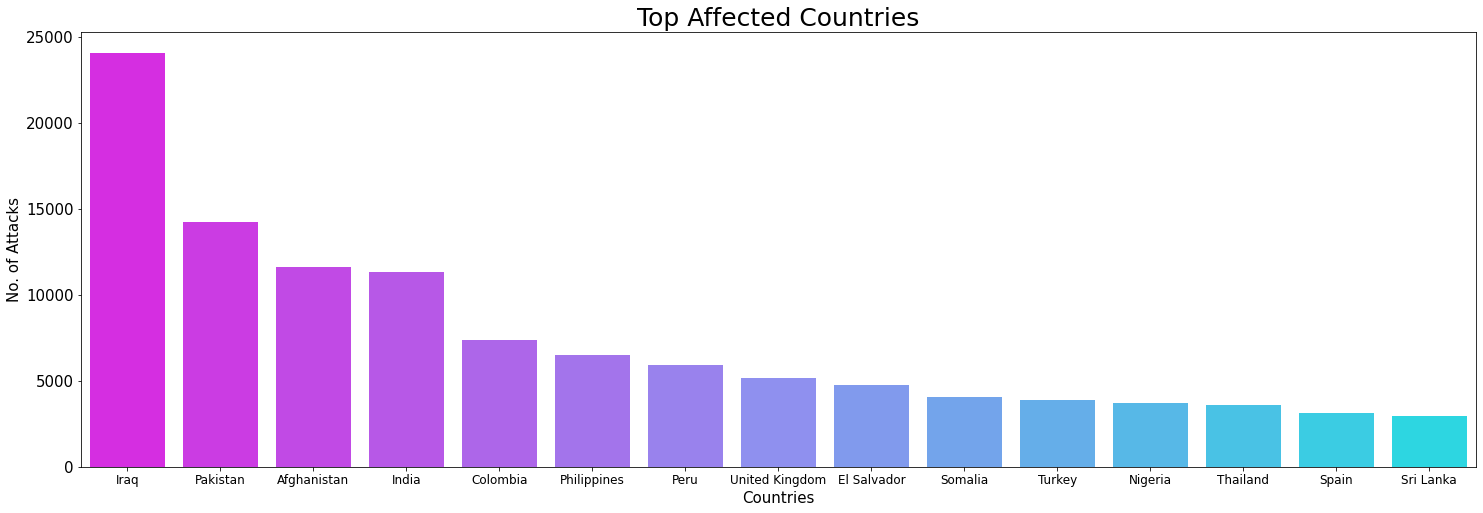

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


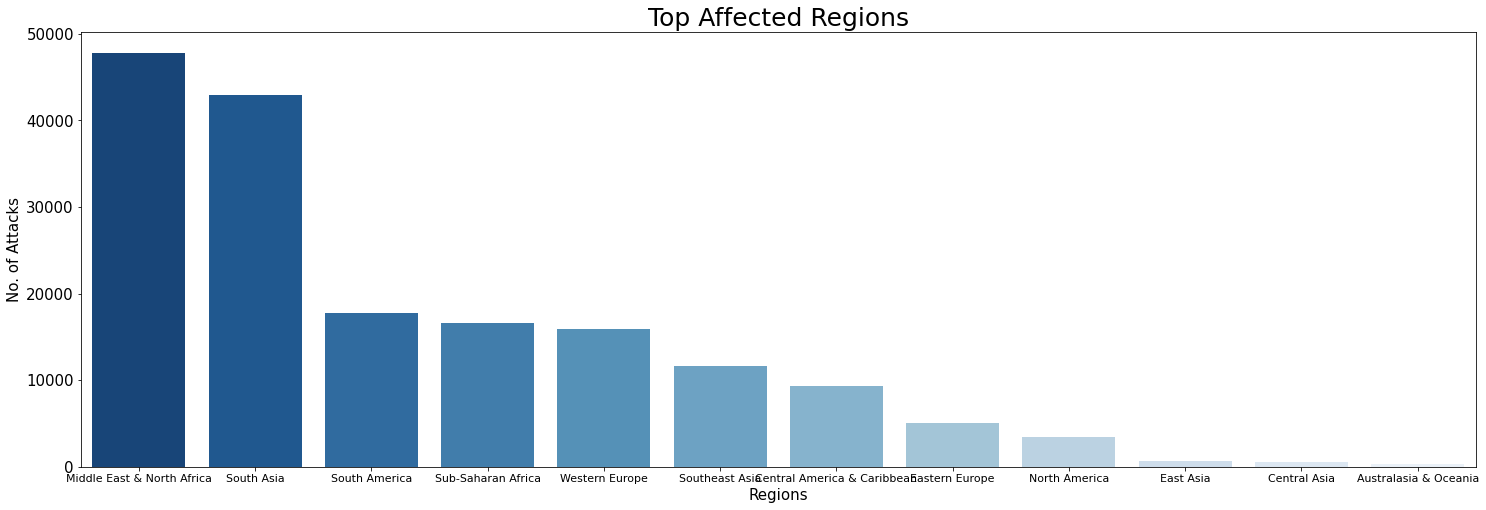

In [ ]:
#Country and region with highest terror attack rate.
max_terror_attack_country = gt_df['Country'].value_counts().index[0]
print(f'Country with Highest Terrorist Attack is {max_terror_attack_country}')

max_terror_attack_region =gt_df['Region'].value_counts().index[0]
print(f'Region with Highest Terrorist Attack is {max_terror_attack_region}')

#Maximum number of People died in this attack.
print('Maximum People killed in an attack are', gt_df['Killed'].max(),'that took place in',gt_df.loc[gt_df['Killed'].idxmax()].Country)

#Terrorism by Country
plt.subplots(figsize=(25,8))
sns.barplot(gt_df['Country'].value_counts()[:15].index,gt_df['Country'].value_counts()[:15].values,palette ='cool_r')
plt.xticks(fontsize = 12)
plt.yticks(fontsize=15)
plt.title('Top Affected Countries',fontsize = 25)
plt.xlabel('Countries',fontsize = 15)
plt.ylabel('No. of Attacks',fontsize = 15)
plt.show()

#Terrorism by Region
plt.subplots(figsize=(25,8))
sns.barplot(gt_df['Region'].value_counts()[:15].index,gt_df['Region'].value_counts()[:15].values,palette ='Blues_r')
plt.xticks(fontsize = 11)
plt.yticks(fontsize=15)
plt.title('Top Affected Regions',fontsize = 25)
plt.xlabel('Regions',fontsize = 15)
plt.ylabel('No. of Attacks',fontsize = 15)
plt.show()

Figures shows the most affected country is Iraq and people killed in this attack are 1570, maximum number of people are killed in this attack. After that Pakistan, Afghanistan, India these countries are affected. and top affected regions are Middle East & North Africa and South Asia based on the total number of attacks.

#Terrorism Analysis in India Between 1970 to 2017

In [ ]:
India = gt_df[gt_df.Country == 'India']
India_cities = India.groupby(by='City',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:5,]

India_suicide_size = India['Suicide'].sum() / len(India)
labels = ['Suicide', 'Not Suicide']

India_year = India.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]

India_weapon = India.groupby(by='Weapon_type',as_index=False).count()[:8].sort_values(by='eventid',ascending=False).iloc[:,:2]


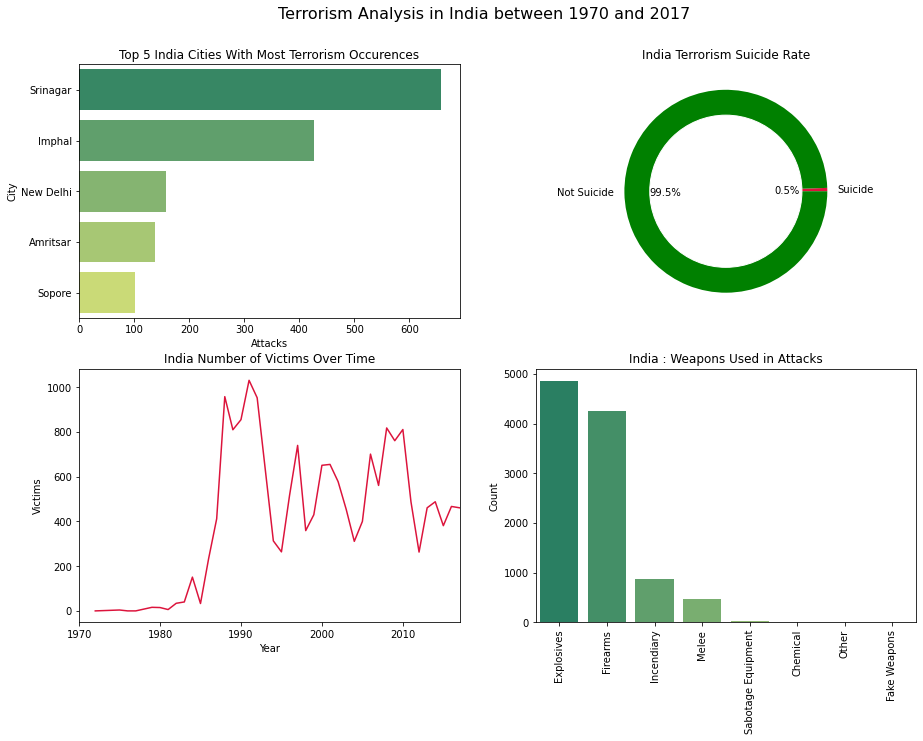

In [ ]:
ig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1 - Top 5 terrorism cities    
sns.barplot(x='eventid', y='City', data=India_cities, ci=None, ax=axs[0, 0],palette='summer')
axs[0, 0].set_title(f'Top 5 India Cities With Most Terrorism Occurences')
axs[0, 0].set_xlabel('Attacks')

# Plot 2 - Suicide Rate
center_circle = plt.Circle((0,0), 0.75, color='white')
axs[0, 1].pie((India_suicide_size, 1-India_suicide_size), labels=labels,colors=['crimson','green'] , autopct='%1.1f%%')
axs[0, 1].add_artist(center_circle)
axs[0, 1].set_title('India Terrorism Suicide Rate')


# Plot 3 - Victims through the years
sns.lineplot(x='Year', y='Killed', data=India_year, ax=axs[1, 0],color='crimson')
axs[1, 0].set_xlim([1970, 2017])
axs[1, 0].set_title('India Number of Victims Over Time')
axs[1, 0].set_ylabel('Victims')

# Plot 4 - Terrorism Weapons
sns.barplot(x='Weapon_type', y='eventid', data=India_weapon, ci=None, ax=axs[1, 1],palette='summer')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('India : Weapons Used in Attacks')

plt.suptitle('Terrorism Analysis in India between 1970 and 2017', size=16)    
plt.subplots_adjust(top=0.90)
plt.show()

Terrorism Analysis in India Between 1970 to 2017 analysis shows us that most terror attack was takes place in Shrinagar.In the decade 1980-90 there are most casualties that's why victim rate is much high in this decade, but sucide rate of India is negligible through all years.  Bombings and explosives is the main weapontype of terrorist, in India most of attacks are done by bombings and explosives.

#Attacks to Kill Comparison

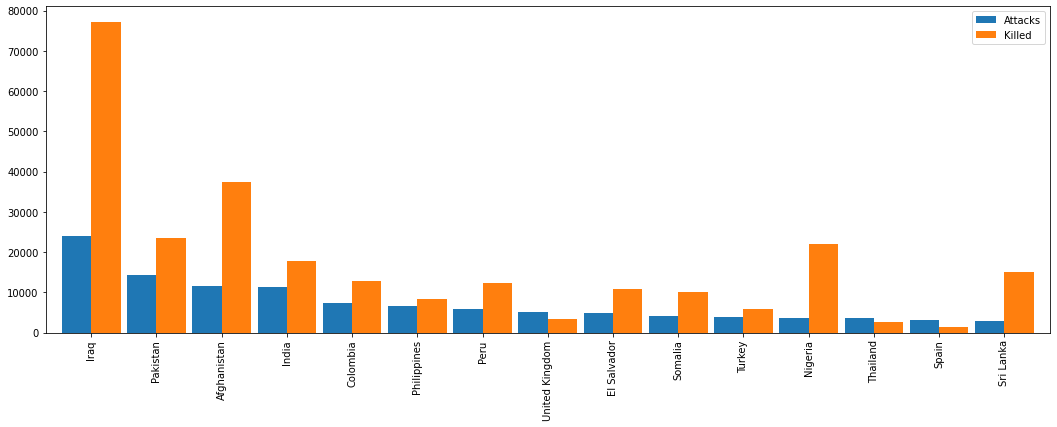

In [ ]:
#Attack v Killed
coun_gt_df = gt_df['Country'].value_counts()[:15].to_frame()
coun_gt_df.columns = ['Attacks']
coun_kill = gt_df.groupby('Country')['Killed'].sum().to_frame()
coun_gt_df.merge(coun_kill, left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches (18,6) 
plt.show()

Figure can analyze kills to attack ratio for the most affected countries. For Iraq, that ratio is very high. This comparison among countries can be taken into considerations while devising new tactics against terrorism.

#Terrorist Groups with highest Terror Attacks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


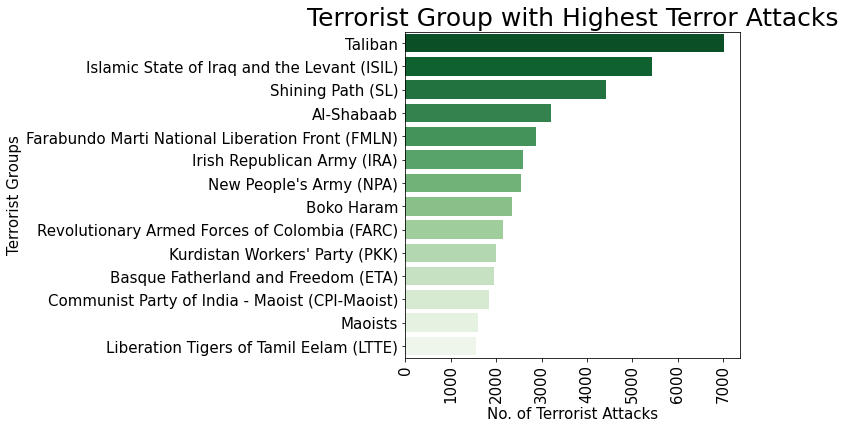

In [ ]:
#Most attack by Terrorist Groups
sns.barplot(gt_df['Group_name'].value_counts()[1:15].values,gt_df['Group_name'].value_counts()[1:15].index,palette = 'Greens_r')
plt.xticks(rotation=90,fontsize = 15)
plt.yticks(fontsize=15)
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.title('Terrorist Group with Highest Terror Attacks', fontsize = 25)
plt.xlabel('No. of Terrorist Attacks',fontsize=15)
plt.ylabel('Terrorist Groups',fontsize=15)
plt.show()



#Active Terrorist Groups by year

Figure describes some of the most notorious terrorist groups and their active years. Almost all groups show multiple crests and troughs during their existence. One of the reasons for this observation could be the resistance terrorist groups have faced from multiple counter-terrorism forces over time.

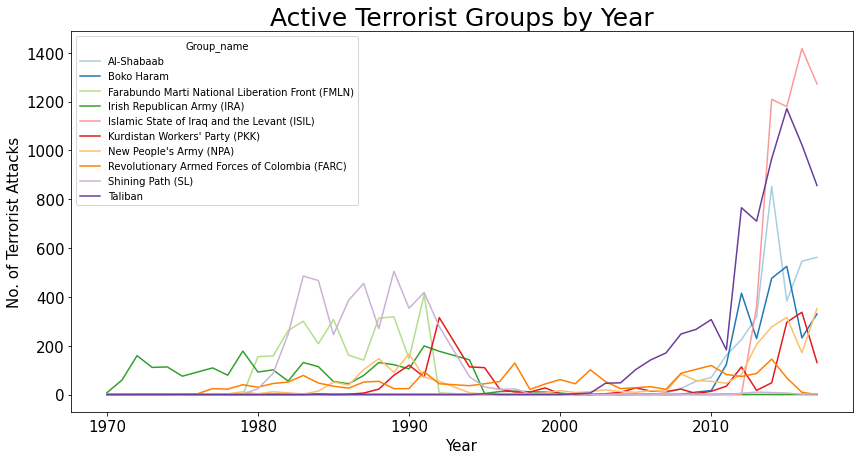

In [ ]:
#Active Terrorist Groups by year
top10_groups = gt_df[gt_df['Group_name'].isin(gt_df['Group_name'].value_counts()[1:11].index)]
pd.crosstab(top10_groups.Year, top10_groups.Group_name).plot(color=sns.color_palette('Paired',10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize=15)
fig = plt.gcf()
fig.set_size_inches(14,7)
plt.title('Active Terrorist Groups by Year',fontsize=25)
plt.xlabel('Year',fontsize=15)
plt.ylabel('No. of Terrorist Attacks',fontsize=15)
plt.show()

Groups like SL (Shining Path) and FMLN (Farabundo Marti National Liberation Front) were highly proactive for almost over a decade from the 1980s to 1990s but after that no trace of those groups in following years. Taliban and ISIL are the major contributors in the recent rise in attacks, especially in North Africa and the Middle East regions.